# Testing of the Perceptron implementation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.utils import plot_decision_regions
%load_ext autoreload
%autoreload 2

from src.models import Perceptron, AdalineGD


In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print(f"Download from the URL: {s}")
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

Download from the URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# Select first 100 rows of df
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[:100, [0, 2]].values

print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.

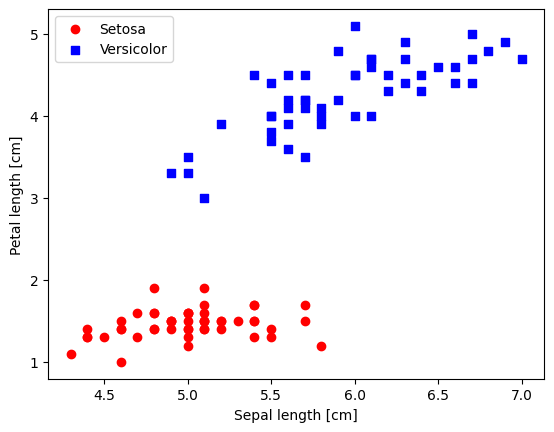

In [4]:
y0_index = y == 0
plt.scatter(X[y0_index, 0], X[y0_index, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[~y0_index, 0], X[~y0_index, 1], color = 'blue', marker = 's', label = 'Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Number of updates')

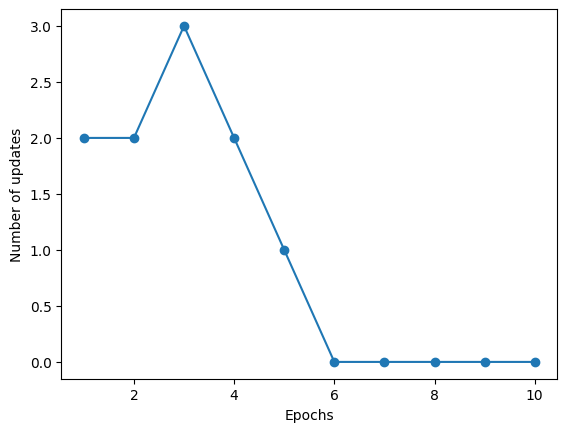

In [5]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

print(ppn.errors_)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

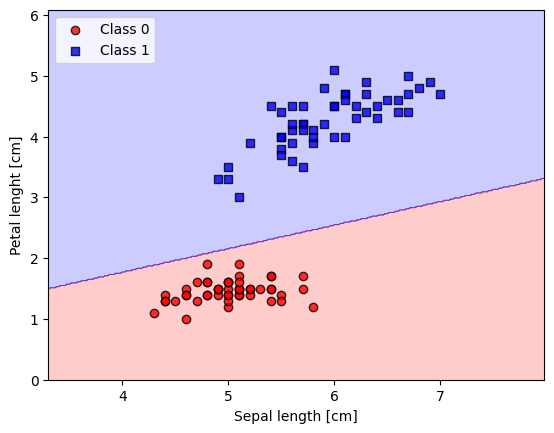

In [6]:
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal lenght [cm]')
plt.legend(loc='upper left')

# Testing of the Adaline implementation

[0.43476858262289936, 12.989056135526758, 649.1077519629887, 32717.72410197406, 1649292.4096844746, 83140547.34173837, 4191100810.898549, 211272677100.59152, 10650219620915.28, 536875754737242.8, 2.7063815234254628e+16, 1.3642823103314627e+18, 6.8773238590823326e+19, 3.466847228357876e+21, 1.747631775243522e+23]
[0.43476858262289936, 0.4305741790776926, 0.42644629551349367, 0.42238385918099214, 0.41838581463878405, 0.41445112347411944, 0.4105787640281561, 0.4067677311256462, 0.40301703580898385, 0.39932570507654314, 0.39569278162524024, 0.39211732359724594, 0.3885984043307873, 0.3851351121149682, 0.3817265499485471]
[4.02121285e+11 2.25033492e+11]
[ 0.02351547 -0.00059521]


Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

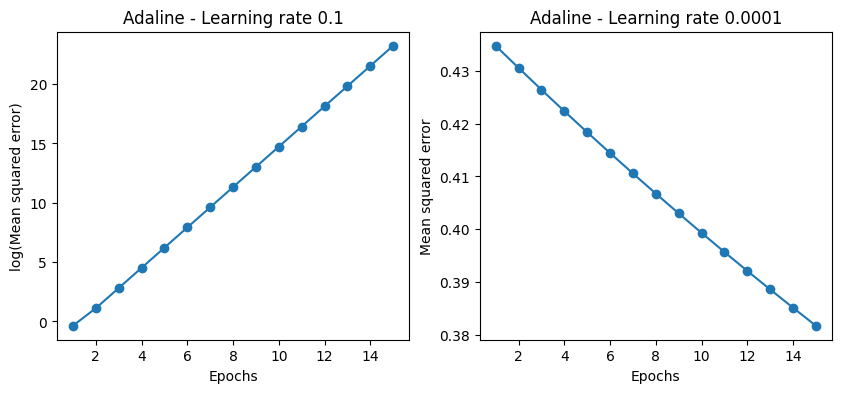

In [14]:
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
print(ada1.losses_)

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
print(ada2.losses_)

print(ada1.w_)
print(ada2.w_)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

In [23]:
X_std = X.copy()
for i in range(X_std.shape[1]):
    X_std[:,i] = (X_std[:,i] - np.mean(X_std[:,i])) / np.std(X_std[:,i])

X_std

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788],
       [-0.11120129, -0.94497788],
       [-1.05093052, -0.87559625],
       [-1.05093052, -1.01435952],
       [-1.8340382 , -1.22250442],
       [ 0.51528486, -1.15312279],
       [ 0.35866332, -0.94497788],
       [-0.11120129, -1.08374115],
       [-0.5810659 , -1.01435952],
       [ 0.35866332, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-0.11120129, -0.80621461],
       [-0.5810659 , -0.94497788],
       [-1.36417359, -1.29188606],
       [-0.5810659 , -0.80621461],
       [-1.05093052, -0.66745134],
       [-0.73768744, -0.87559625],
       [-0.73768744, -0.87559625],
       [-0.42444437, -0.94497788],
       [-0.42444437,

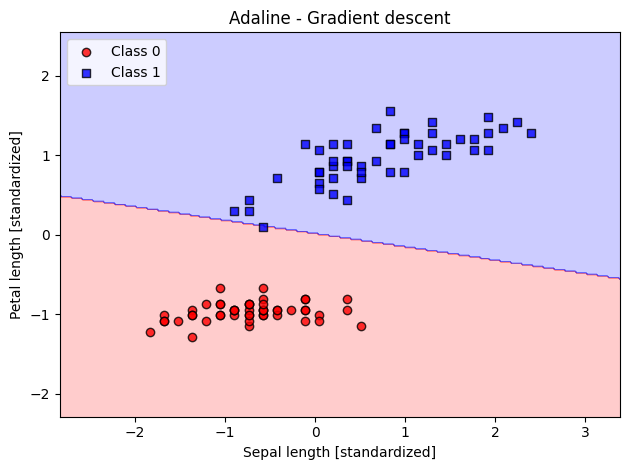

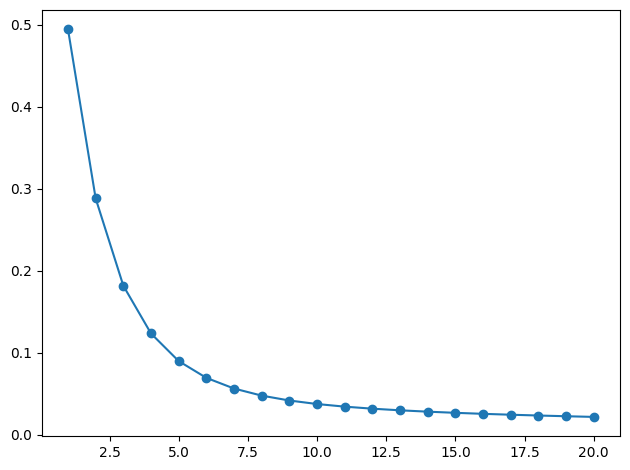

In [37]:
ada_gd = AdalineGD(n_iter=20, eta=0.1)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_)+1), ada_gd.losses_, marker='o')
plt.tight_layout()
plt.show()

36122.242